filter kernels:
* linear smoothing filters
    - box filter
    - gaussian filter
    - binomial filter
* derivative filters:
    - prewitt operator
    - sobel filter
    - laplace operator
* nonlinear smoothing
    - min filter
    - max filter
    - median filter
    - knn filter - missing
    - symmetric knn filter - missing

## Convolution

In [21]:
to_convolve=[[2,0,0,0],
             [0,2,1,2],
             [0,1,2,1],
             [0,2,1,2]]

kernel = [[0,-1,-2],
         [1,0,-1],
         [2,1,0]]


box = np.ones((3,3))*1/(3*3) 

sobel_v = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])*(1/4)
sobel_h = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])*(1/4)
sobel_d1 = np.array([[0,-1,-2],[1,0,-1],[2,1,0]])*(1/4)
sobel_d2 = np.flipud(sobel_d1)

gauss_3 = np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

binom_3 = np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
binom_4 = np.array([[1,3,3,1],[3,9,9,3],[3,9,9,3],[1,3,3,1]])*(1/64)
binom_5 = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])*(1/256)

prewitt = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])*(1/3)
laplace = np.array([[0,1,0],[1,-4,-1],[0,1,0]])*(1/4)

#kernel = gauss_3

my_convolve2d(np.array(to_convolve),
              np.array(laplace),
              strides=1,
              padding="valid") # "valid" for ignoring boundaries, "same" for zero padding

0.0*2 + 0.25*0 + 0.0*0 + 0.25*0 + (-1.0)*2 + (-0.25)*1 + 0.0*0 + 0.25*1 + 0.0*2 +  =  -2.0
[[-2.  0.]
 [ 0.  0.]]
0.0*0 + 0.25*0 + 0.0*0 + 0.25*2 + (-1.0)*1 + (-0.25)*2 + 0.0*1 + 0.25*2 + 0.0*1 +  =  -0.5
[[-2.  -0.5]
 [ 0.   0. ]]
0.0*0 + 0.25*2 + 0.0*1 + 0.25*0 + (-1.0)*1 + (-0.25)*2 + 0.0*0 + 0.25*2 + 0.0*1 +  =  -0.5
[[-2.  -0.5]
 [-0.5  0. ]]
0.0*2 + 0.25*1 + 0.0*2 + 0.25*1 + (-1.0)*2 + (-0.25)*1 + 0.0*2 + 0.25*1 + 0.0*2 +  =  -1.5
[[-2.  -0.5]
 [-0.5 -1.5]]


array([[-2. , -0.5],
       [-0.5, -1.5]])

## nonlinear filter kernels

In [22]:
image=[[2,0,0,0],
             [0,2,1,2],
             [0,1,2,1],
             [0,2,1,2]]

kernel = np.ones((3,3))
print(kernel)

print()
#min
print("min\n",minimum_filter(image, footprint=kernel))
print()
#max
print("max\n",maximum_filter(image, footprint=kernel))
print()
#median
print("median\n",median_filter(image, size=3, mode="constant", cval=0))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

min
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [0 0 1 1]]

max
 [[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]

median
 [[0 0 0 0]
 [0 1 1 0]
 [0 1 2 1]
 [0 0 1 0]]


## Morphological operators

### Erosion, dilation, opening, closing

In [23]:
# erosion
image=[[2,0,0,0],
             [0,2,1,2],
             [0,1,2,1],
             [0,2,1,2]]

kernel = [[0,0,1],
          [1,1,1],
          [1,0,0]]


print("erosion:\n",erosion(image,kernel))
print()
print("dilation:\n",dilation(image,kernel))
print()
print("opening:\n",dilation(erosion(image,kernel), kernel))
print()
print("closing:\n",erosion(dilation(image,kernel), kernel))

erosion:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [0 0 1 1]]

dilation:
 [[2 2 2 1]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]

opening:
 [[0 0 0 0]
 [0 0 0 1]
 [0 1 1 1]
 [0 1 1 1]]

closing:
 [[2 2 1 1]
 [2 2 1 1]
 [2 2 2 2]
 [2 2 2 2]]


### Hit or miss

In [24]:
image=[[0,0, 1, 0,0,0,0],
       [0,0,1,0,1,0,0],
       [0,1,0,1,1,0,0],
       [0,0,0,0,0,1,0],
      [1,0,0,1,0,1,0],
      [0,0,1,1,0,1,0],
      [0,0,0,0,0,0,0]]

hit=[[0,1],
     [1,1],]

miss=[[1,1,1,1],
      [1,1,0,1],
      [1,0,0,1],
     [1,1,1,1]]

binary_hit_or_miss(image, hit, miss)

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False]])

## Euclidean distance transform

In [19]:
image=[[0,0,0,0],
       [1,1,0,0],
       [1,1,1,0],
       [1,1,1,0]]

kernel = [[0,1,1],
         [1,0,1],
         [2,1,0]]

image = np.array(image)
# normal distance transform
dt = distance_transform_edt(image)
print(dt)
print()
print("generalized")
# generalized dt
dt = np.where(dt != 0, dt, -1*distance_transform_edt(~image))
print(dt)

[[0.         0.         0.         0.        ]
 [1.         1.         0.         0.        ]
 [2.         1.41421356 1.         0.        ]
 [2.82842712 2.         1.         0.        ]]

generalized
[[-1.         -1.41421356 -2.23606798 -3.16227766]
 [ 1.          1.         -2.82842712 -3.60555128]
 [ 2.          1.41421356  1.         -4.24264069]
 [ 2.82842712  2.          1.         -5.        ]]


## Interactive hough transform

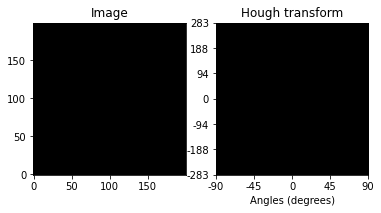

In [20]:
interactive_hough()

## Color

Color conversion tools:  
https://convertingcolors.com/rgb-color-255_255_255.html?search=RGB(255,25Untitled 35,255)  
https://coolors.co/73663f

# Run all below!!

In [9]:
from scipy.ndimage.morphology import binary_hit_or_miss
from skimage.morphology import erosion, dilation
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np
from scipy.ndimage import maximum_filter, minimum_filter, median_filter

In [10]:
def my_convolve2d(img, kern, strides=1, padding="valid"):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    # YOUR CODE HERE
    if padding == "same":
        # add padding to image with half the kernel size at each side
        padded = np.zeros([M+2*mh,N+2*nh])
        padded[mh:mh+M, nh:nh+N]=img
    elif padding == "valid":
        padded = img

    pM, pN = padded.shape    
    result = np.zeros(((padded.shape[0]-m)//strides+1, (padded.shape[1]-n)//strides+1))

    for r in range(pM-m+1):
        for h in range(pN-n+1):
            if r%strides==0 and h%strides==0:
                result[r//strides, h//strides] += np.sum(kern * padded[r:r+m, h:h+n])
                
                outstring = ""
                for k,p in zip(kern.flatten(), padded[r:r+m, h:h+n].flatten()):
                    outstring += str(k) if k>=0 else "("+str(k)+")"
                    outstring += "*"+str(p)+" + " if p>=0 else "*("+str(p)+") + "
                print(outstring[:-1]," = ", np.sum(kern * padded[r:r+m, h:h+n]))
                print(result)

    return result

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure
from imageio import imread
from skimage import morphology

def my_distance_transform(img, structure=morphology.square(5), general=True):
    """Distance transform of binary image.

    Args:
    img (ndarray of bools): A binary image.
        
    Returns:
    dt (ndarray of ints): The distance transform of the input image.
    """
    original = np.copy(img)
    dt = np.zeros(img.shape,np.int32)
    # YOUR CODE HERE
    n = 0
    while np.any(img):
        boundary = img ^ morph.binary_erosion(img, structure)
        dt[boundary] = n
        img = img ^ boundary
        n += 1
        print("t",img)
    
    if general:
        n=0
        img = original
        while np.any(~img):
            print("test", img, ~img)
            boundary = img ^ morph.binary_dilation(img, structure)
            print()
            print("img:", img)
            print("dilated",morph.binary_dilation(img, structure))
            print()
            print(boundary)
            print()
            print()
            dt[boundary] = n
            img = img ^ boundary
            n -= 1

    # normalize
    #dt = dt + np.abs(np.min(dt))

    return dt

In [12]:
#%matplotlib notebook
from skimage.transform import hough_line
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

def interactive_hough():
    # True if two mouse clicks should draw a line, false if single clicks draw points
    lines = True


    steps = lambda p,q : max(map(lambda x,y: abs(x-y), p, q))+1
    coords = lambda p,q,s : tuple([np.linspace(x,y,s,dtype=np.uint16) for x,y in zip(p,q)])
    img = np.zeros((200,200))


    def line(img, p, q):
        """Insert a line from p to q in the black/white image

        Args:
            img (ndarray): Input image.
            p (tuple): Coordinate of start position.
            q (tuple): Coordinate of end position.

        Returns:

        """
        img[coords(p,q,steps(p,q))] = 1


    def disp_and_comp():
        """Computes Line Hough transform; displays image and result

        Args:

        Returns:

        """
        ax1.imshow(img, origin = 'lower', cmap='gray')

        out, angles, d = hough_line(img)

        out_resized = resize(out, (out.shape[0], out.shape[0]), anti_aliasing=True, preserve_range=True)
        ax2.imshow(np.log(1 + out_resized), origin = 'lower', cmap='gray')
        ax2.set_yticks(np.linspace(0, out.shape[0], 7))
        ax2.set_yticklabels((-1 * np.linspace(d[-1], d[0], 7)).astype(int))
        ax2.set_xticks(np.linspace(0, out.shape[0], 5))
        ax2.set_xticklabels(np.linspace(np.rad2deg(angles[0]), np.rad2deg(angles[-1]), 5).astype(int))

        fig.canvas.draw()


    first_point = True
    p1 = (0,0)
    def on_press(event):
        """Draws either line or point and calls disp_and_comp

        Reacts to mouse clicks. Draws either point at mouse
        position and computes Hough transform or draws line
        between first and second mouse click and then computes
        hough transfom.

        Args:
            event (event): Mouseevent.

        Returns:

        """
        global p1, first_point
        y = int(event.xdata)
        x = int(event.ydata)

        if (lines):
            if (first_point):
                p1 = (x,y)
                img[x, y] = 255
                first_point = False
            else:
                line(img,p1,(x,y)) 
                first_point = True
            disp_and_comp()
        else:
            img[x, y] = 255
            disp_and_comp()






    fig = plt.figure(figsize=(6, 4))

    ax1 = fig.add_subplot(121)
    plt.title('Image')

    ax2 = fig.add_subplot(122)
    plt.title('Hough transform');
    plt.xlabel('Angles (degrees)')
    plt.ylabel('Distance (pixels)')


    disp_and_comp()
    #plt.axis('square')
    fig.canvas.mpl_connect('button_press_event', on_press)
    
